In [22]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [15]:
types = pd.read_csv("types.csv", sep=';')
codes = pd.read_csv("codes.csv", sep=';')
transactions = pd.read_csv("transactions.csv", sep=';')
train_set = pd.read_csv("train_set.csv", sep=';')
test_set = pd.read_csv("test_set.csv", sep=';')

In [16]:
'''
    type - ID of type
    type_description - description of type
'''
print(types.dtypes)
types.head()

type                 int64
type_description    object
dtype: object


,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [17]:
'''
    code - ID of code
    code_description - description of code
'''
print(codes.dtypes)
codes.head()

code                 int64
code_description    object
dtype: object


,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [18]:
'''
    client_id - client is id 
    datetime - transaction date (format - ordered day number hh:mm:ss - 421 06:33:15) 
    code - transaction code 
    type - transaction type
    sum - sum of transactio
'''
print(transactions.dtypes)
transactions.head()

client_id      int64
datetime      object
code           int64
type           int64
sum          float64
dtype: object


,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [19]:
'''
    client_id - client is id 
    target - target column
'''
print(train_set.dtypes)
train_set.head()

client_id    int64
target       int64
dtype: object


,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [20]:
'''
    Join `transactions` and `train_set` dataframes
'''
df = transactions.set_index("client_id").join(train_set.set_index("client_id")).reset_index().dropna()
df.head()

,client_id,datetime,code,type,sum,target
0,22899,231 09:31:53,6011,2110,-6737.75,1.0
1,22899,349 16:34:52,6011,4010,-8759.07,1.0
2,22899,441 15:36:37,6011,4010,-8759.07,1.0
3,22899,167 09:50:12,4814,1030,-1122.96,1.0
4,22899,221 18:54:19,5399,1110,-4626.59,1.0


In [21]:
'''
    Do time and day as different columns
    Add column weekday to analyze
    Add hours, minutes and seconds for time colunm
    Drop datetime, time client
'''
df[["day", "time"]] = df["datetime"].str.split(' ', 0, expand=True)
df[["hours", "minute", "seconds"]] = df["time"].str.split(':', 0, expand=True)
df.day = df.day.astype(int)
df.hours = df.hours.astype(int)
df.minute = df.minute.astype(int)
df.seconds = df.seconds.astype(int)
df.target = df.target.astype(int)
df["weekday"] = df.day % 7
df = df.drop(columns=["datetime", "time"])
print(df.dtypes)
df.head()

client_id      int64
code           int64
type           int64
sum          float64
target         int32
day            int32
hours          int32
minute         int32
seconds        int32
weekday        int32
dtype: object


,client_id,code,type,sum,target,day,hours,minute,seconds,weekday
0,22899,6011,2110,-6737.75,1,231,9,31,53,0
1,22899,6011,4010,-8759.07,1,349,16,34,52,6
2,22899,6011,4010,-8759.07,1,441,15,36,37,0
3,22899,4814,1030,-1122.96,1,167,9,50,12,6
4,22899,5399,1110,-4626.59,1,221,18,54,19,4


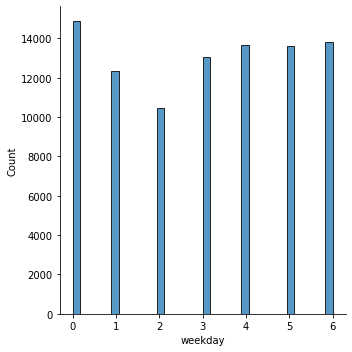

In [22]:
'''
    The count of week days
'''
sns.displot(df["weekday"])

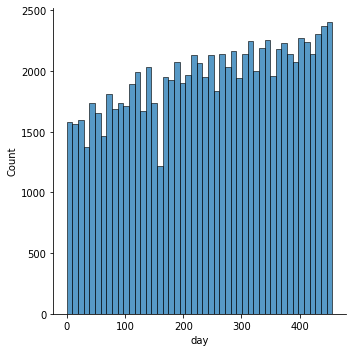

In [23]:
'''
    Count of days
'''
sns.displot(df["day"])

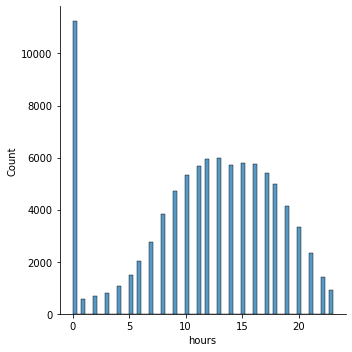

In [24]:
'''
    Count of hours when the transaction was
'''
sns.displot(df["hours"])

In [25]:
df.shape

(91826, 10)

target
0    46715
1    45111
Name: counts, dtype: int64


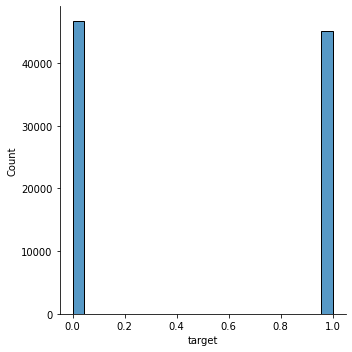

In [26]:
'''
    Proportion of 2 gender
'''
print(df.groupby("target").count().rename(columns={"client_id": "counts"}).counts)
sns.displot(df["target"])

In [50]:
X = df.drop(columns=["hours","minute","seconds","day", "target", "client_id"])
X.head()

,code,type,sum,weekday
0,6011,2110,-6737.75,0
1,6011,4010,-8759.07,6
2,6011,4010,-8759.07,0
3,4814,1030,-1122.96,6
4,5399,1110,-4626.59,4


<AxesSubplot:xlabel='weekday', ylabel='sum'>

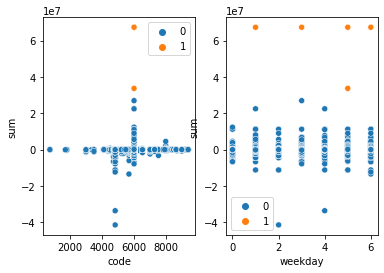

In [28]:
'''
    KMeans
'''
f, axes = plt.subplots(1, 2)
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X)
sns.scatterplot(x=X['code'], y=X['sum'], hue=kmeans.labels_, ax=axes[0])
sns.scatterplot(x=X['weekday'], y=X['sum'], hue=kmeans.labels_, ax=axes[1])

<AxesSubplot:xlabel='weekday', ylabel='sum'>

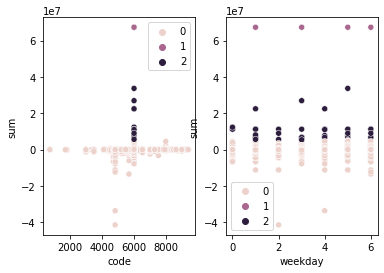

In [29]:
f, axes = plt.subplots(1, 2)
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)
sns.scatterplot(x=X['code'], y=X['sum'], hue=kmeans.labels_, ax=axes[0])
sns.scatterplot(x=X['weekday'], y=X['sum'], hue=kmeans.labels_, ax=axes[1])

<AxesSubplot:>

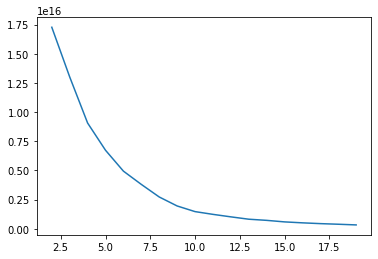

In [52]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

sns.lineplot(x=list(range(2,20)), y = distorsions)

<AxesSubplot:xlabel='code', ylabel='type'>

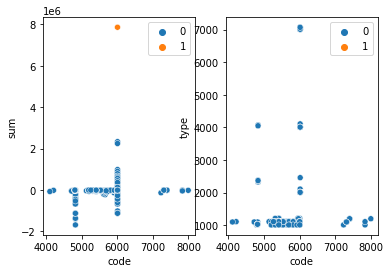

In [54]:
'''
    Hierarchical clustering
'''
from sklearn.cluster import AgglomerativeClustering
X_head = X.head(1000)
cluster = AgglomerativeClustering().fit(X_head)
f, axes = plt.subplots(1, 2)
sns.scatterplot(x=X_head['code'], y=X_head['sum'], hue=cluster.labels_, ax=axes[0])
sns.scatterplot(x=X_head['code'], y=X_head['type'], hue=cluster.labels_, ax=axes[1])

<AxesSubplot:xlabel='weekday', ylabel='sum'>

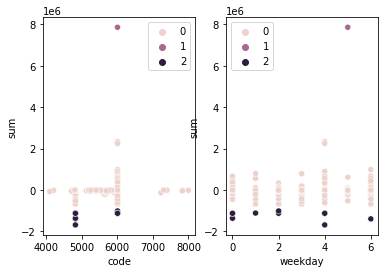

In [55]:
cluster = AgglomerativeClustering(n_clusters = 3).fit(X_head)
f, axes = plt.subplots(1, 2)
sns.scatterplot(x=X_head['code'], y=X_head['sum'], hue=cluster.labels_, ax=axes[0])
sns.scatterplot(x=X_head['weekday'], y=X_head['sum'], hue=cluster.labels_, ax=axes[1])

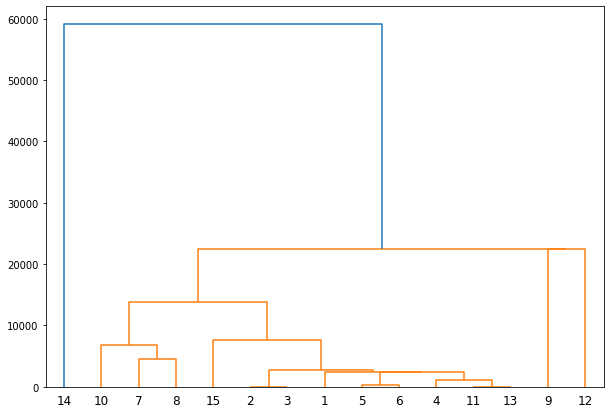

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_head.head(15))

labelList = range(1, 16)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()